# Data Analysis

In [1]:
import pandas as pd 
from matplotlib import pyplot as plt
import os
os.chdir('../')
print(os.getcwd())

/home/akin/PycharmProjects/training


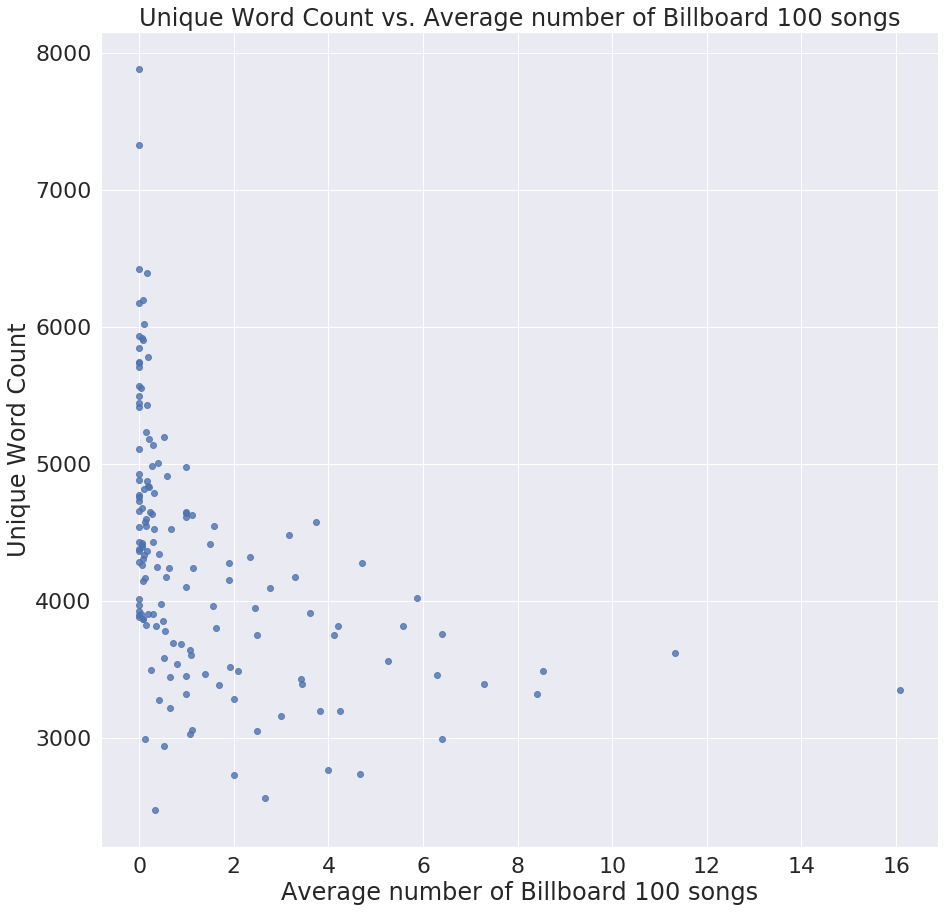

In [47]:
artist_billboard_df = pd.read_csv('data/artist_billboard.csv')
artist_billboard_df = artist_billboard_df.drop(["Num Billboard Songs", "Years Active"], axis=1)
artist_billboard_df.head(10)
plt.subplots(figsize=(15,15))
at = sns.regplot('Avg Billboard Songs', 'Unique Word Count', data=artist_billboard_df, fit_reg=False)
at.set(xlabel='Average number of Billboard 100 songs', 
       ylabel='Unique Word Count', 
       title='Unique Word Count vs. Average number of Billboard 100 songs')
at.figure.savefig('artists.png')

## Load Lyric Corpus

In [30]:
import csv
embeddings = []
id_to_covariate = {'0': 'Pop', '1':'Rock', '2': 'Hip Hop' }

with open("data/corpus_big.txt", "r") as csv_file:
        reader = csv.reader(csv_file, delimiter=' ')
        for embedding in reader:
            embeddings.append([embedding[0], embedding[1:]])
corpus = pd.DataFrame(embeddings, columns=['covariate', 'lyric'])
corpus['covariate'] = corpus['covariate'].map(id_to_covariate)
corpus.head(10)

,covariate,lyric
0,Pop,"[daddy, oh, daddy, poppy, oh, poppy, i, need, ..."
1,Pop,"[dis, is, the, point, when, i, need, everybody..."
2,Pop,"[you, had, a, lot, of, crooks, tryna, steal, y..."
3,Pop,"[the, blank, pages, of, my, diary, that, i, ha..."
4,Pop,"[its, christmas, time, and, there, is, just, o..."
5,Pop,"[once, there, was, a, way, to, get, back, home..."
6,Pop,"[follow, me, to, the, river, in, over, your, h..."
7,Pop,"[ive, been, taking, what, youve, given, now, i..."
8,Pop,"[ive, been, having, a, hard, time, sleeping, i..."
9,Pop,"[you, need, to, stop, playing, round, with, al..."


In [31]:
corpus.count()

covariate    100000
lyric        100000
dtype: int64

## Analysis

## Average Number of Words per Lyrics per Genre

covariate
Hip Hop    443.949400
Pop        289.440667
Rock       206.532820
Name: word_count, dtype: float64


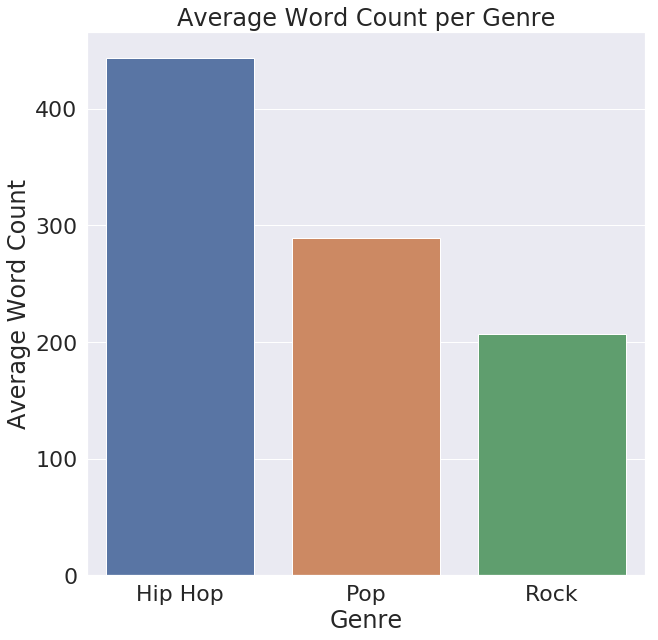

In [33]:
import seaborn as sns
plt.subplots(figsize=(10,10))
sns.set(font_scale = 2)
corpus['word_count'] = corpus['lyric'].str.len()
z = corpus['word_count'].groupby(corpus['covariate']).mean()
print(z)
d = corpus['word_count'].groupby(corpus['covariate']).mean().to_frame()
d.reset_index(level=0, inplace=True)
ax = sns.barplot(x="covariate",y="word_count", data=d)
ax.set(xlabel='Genre', ylabel='Average Word Count', title='Average Word Count per Genre')
ax.figure.savefig('h.png')

## Most Common Words per Genre

In [ ]:
from itertools import chain
from collections import Counter
common_words_per_genre = []
for covariate in corpus['covariate'].unique():
    covariate_corpus = corpus[corpus['covariate'] == covariate]
    lyrics = chain.from_iterable(covariate_corpus['lyric'].to_list())
    covariate_word_count = Counter(lyrics)
    common_words_per_genre.append(covariate_word_count)

In [ ]:
for i, covariate_word_count in enumerate(common_words_per_genre):
    plt.subplots(figsize=(20,15))
    keys, values = zip(*covariate_word_count.most_common(12))
    data = {"word": keys, "count": values}
    common_words_df = pd.DataFrame.from_dict(data)
    common_words_plot = sns.barplot(x="word",y="count", data=common_words_df, ).set_title("Most Common Words in {}".format(id_to_covariate[str(i)]))

## Benchmarks